In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

baseInteira = pd.read_csv('baseSimulada/tabelao.csv', sep=';')

baseInteira.head()

,id_items,id_pedido,Data_pedido,diaSemana,DiaSemanaStr,id_cliente,Gender,Age,id_restaurante,tip_culinaria,item_menu,tip_pedido,Qde,price,total_value
0,1,1,44927,1,1,139,Feminino,36,9,Portuguesa,73,Bebida Alcoolica,6,8.333333,50.000000
1,2,1,44927,1,1,139,Feminino,36,9,Portuguesa,13,Prato,2,100.000000,200.000000
2,3,2,44927,1,1,295,Masculino,36,8,Francesa,18,Prato,1,78.000000,78.000000
3,4,2,44927,1,1,295,Masculino,36,8,Francesa,103,Sobremesa,1,120.075791,120.075791
4,5,3,44927,1,1,584,Masculino,36,3,Americana,3,Prato,1,72.000000,72.000000


In [19]:
baseDropada = baseInteira.drop(columns=['id_items','id_pedido','Data_pedido','DiaSemanaStr', 'item_menu','id_cliente', 'tip_culinaria', 'Qde', 'price', 'total_value'])

baseDropada.head()

,diaSemana,Gender,Age,id_restaurante,tip_pedido
0,1,Feminino,36,9,Bebida Alcoolica
1,1,Feminino,36,9,Prato
2,1,Masculino,36,8,Prato
3,1,Masculino,36,8,Sobremesa
4,1,Masculino,36,3,Prato


In [21]:
#Pré-processamento: tratamento de dados inconsistentes ou redundantes
#Remove dados duplicados, que para fim estátisticos são irrelevantes
orders_duplicates = baseDropada [ baseDropada.duplicated(subset=['diaSemana', 'Gender', 'Age',	'id_restaurante', 'tip_pedido'], keep=False)]

if len(orders_duplicates) > 0:
  print('\nAmostras redudantes ou inconsistentes:\n')
  print(orders_duplicates)
else: print('\nNão existem amostras redudantes ou inconsistentes')


Amostras redudantes ou inconsistentes:

       diaSemana     Gender  Age  id_restaurante        tip_pedido
0              1   Feminino   36               9  Bebida Alcoolica
1              1   Feminino   36               9             Prato
2              1  Masculino   36               8             Prato
3              1  Masculino   36               8         Sobremesa
4              1  Masculino   36               3             Prato
...          ...        ...  ...             ...               ...
72632          6  Masculino   48               5  Bebida Alcoolica
72633          6  Masculino   48               5             Prato
72635          6   Feminino   23              10             Prato
72636          6  Masculino   41              14             Prato
72638          6  Masculino   53               2             Prato

[62892 rows x 5 columns]


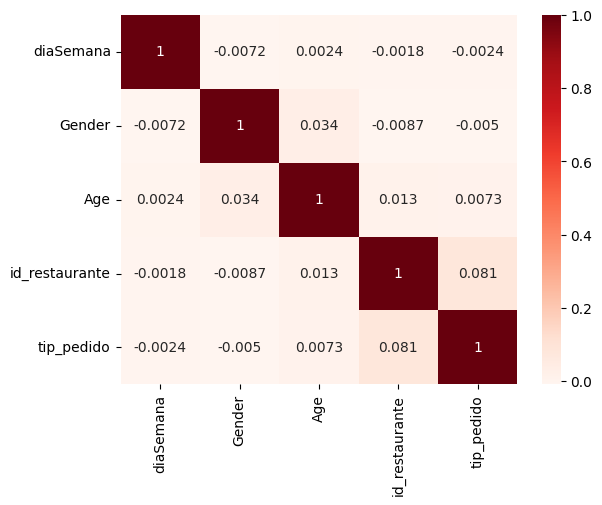

In [22]:
baseDropada.loc[baseDropada['Gender'] == 'Feminino', 'Gender'] = 0
baseDropada.loc[baseDropada['Gender'] == 'Masculino', 'Gender'] = 1
baseDropada.loc[baseDropada['tip_pedido'] == 'Prato', 'tip_pedido'] = 0
baseDropada.loc[baseDropada['tip_pedido'] == 'Bebida Alcoolica', 'tip_pedido'] = 1
baseDropada.loc[baseDropada['tip_pedido'] == 'Bebida não Alcolica', 'tip_pedido'] = 2
baseDropada.loc[baseDropada['tip_pedido'] == 'Sobremesa', 'tip_pedido'] = 3

sns.heatmap(baseDropada.corr(), annot=True, cmap="Reds") 
plt.show()

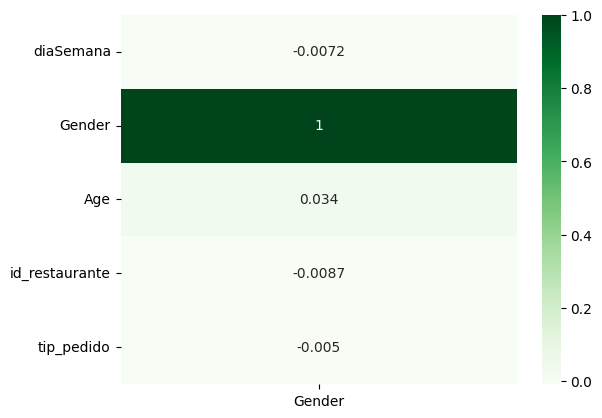

In [23]:
sns.heatmap(baseDropada.corr()[["Gender"]], annot=True, cmap="Greens")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

y = baseDropada["id_restaurante"]
x = baseDropada.drop("id_restaurante", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [27]:
from sklearn import metrics

#cria as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.007674518039869849
-0.03636325036279664


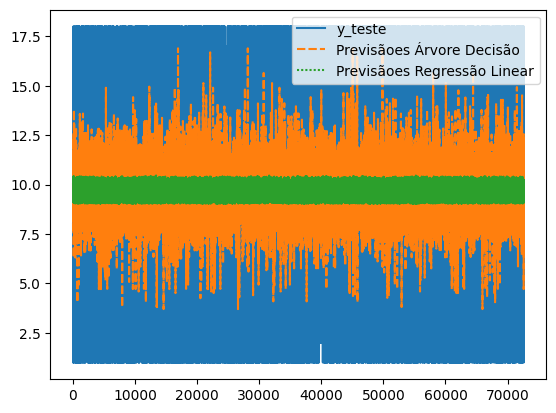

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsãoes Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsãoes Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()